In [1]:
import numpy
import json
import numpy as np
import pandas as pd
import tensorflow as tf
import ipykernel
import subprocess
from collections import deque
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
# import gym

In [2]:
print(numpy.version.version)
print(ipykernel.__version__)
tf.config.list_physical_devices()


1.23.3
6.15.2


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# My personal highscore for that level

In [3]:
highscore = {"commands": [{"power": 4, "rotation": -43}, {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43},
                          {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43},
                          {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43},
                          {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43},
                          {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43},
                          {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43},
                          {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43},
                          {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43},
                          {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43}, {"power": 4, "rotation": -43},
                          {"power": 3, "rotation": -22}, {"power": 3, "rotation": -22}, {"power": 3, "rotation": -22}, {"power": 3, "rotation": -22},
                          {"power": 3, "rotation": -22}, {"power": 3, "rotation": -22}, {"power": 3, "rotation": -22}, {"power": 3, "rotation": -22},
                          {"power": 3, "rotation": -22}, {"power": 3, "rotation": -22}, {"power": 3, "rotation": -22}, {"power": 3, "rotation": -22},
                          {"power": 4, "rotation": -5}, {"power": 4, "rotation": -5}, {"power": 4, "rotation": -5}, {"power": 4, "rotation": -5},
                          {"power": 4, "rotation": -5}, {"power": 4, "rotation": -5}, {"power": 4, "rotation": -5}, {"power": 4, "rotation": -5},
                          {"power": 4, "rotation": -5}, {"power": 4, "rotation": -5}, {"power": 4, "rotation": -5}, {"power": 4, "rotation": -5},
                          {"power": 4, "rotation": -5}, {"power": 4, "rotation": -5}, {"power": 4, "rotation": -5}, {"power": 4, "rotation": -5},
                          {"power": 4, "rotation": -5}, {"power": 3, "rotation": 0}, {"power": 3, "rotation": 0}, {"power": 3, "rotation": 0},
                          {"power": 3, "rotation": 0}, {"power": 3, "rotation": 0}, {"power": 3, "rotation": 0}, {"power": 3, "rotation": 0},
                          {"power": 3, "rotation": 0}, {"power": 3, "rotation": 0}, {"power": 4, "rotation": 0}, {"power": 4, "rotation": 0},
                          {"power": 4, "rotation": 0}, {"power": 4, "rotation": 0}, {"power": 4, "rotation": 0}, {"power": 4, "rotation": 0},
                          {"power": 4, "rotation": 0}, {"power": 4, "rotation": 0}, {"power": 4, "rotation": 0}, {"power": 4, "rotation": 0},
                          {"power": 4, "rotation": 0}, {"power": 4, "rotation": 0}, {"power": 4, "rotation": 0}, {"power": 4, "rotation": 0},
                          {"power": 4, "rotation": 0}], "score": 421}

In [4]:
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

## run and visualize one prerecorded game

In [5]:
from importlib import reload
import MarsLanderGymEnv

reload(MarsLanderGymEnv)

from MarsLanderGymEnv import MarsLanderGymEnv

infos = []

replay_commands = deque(highscore["commands"])

with MarsLanderGymEnv() as env:
    obs = env.reset(seed=42)
    # while True:  # not done:
    while len(replay_commands) > 0:  # not done:
        action = replay_commands.popleft()
        random_action =  action
        # random_action = env.action_space.sample()
        # print("action", random_action)
        obs, reward, done, truncated, info = env.step(random_action)
        infos.append(info)
        # print('reward', reward)
        if done:
            # print("is_done")
            break


In [6]:
infos[0]["state"]

{'collisionDistanceOnCurrentTrajectory': None,
 'distanceLandingArea': 2800.102844648587,
 'fuel': 749,
 'hSpeed': -90.96592582628907,
 'horizontalDistanceLandingArea': -909.5170370868555,
 'isCrashed': False,
 'isLanded': False,
 'isOffLimits': False,
 'isOutOfFuel': False,
 'landing-distance-0': 3580.3801799301427,
 'landing-distance-100': 2800.1031694643298,
 'landing-distance-25': 3339.5527005181016,
 'landing-distance-50': 3125.276227190069,
 'landing-distance-75': 2943.3552288063256,
 'landing-path-free-0': True,
 'landing-path-free-100': True,
 'landing-path-free-25': True,
 'landing-path-free-50': True,
 'landing-path-free-75': True,
 'power': 1,
 'radar-maybe-intersection-distance--10': None,
 'radar-maybe-intersection-distance--15': None,
 'radar-maybe-intersection-distance--20': None,
 'radar-maybe-intersection-distance--25': None,
 'radar-maybe-intersection-distance--30': None,
 'radar-maybe-intersection-distance--35': None,
 'radar-maybe-intersection-distance--40': None,
 

In [7]:
states = [kv['state'] for kv in infos]
json_ary = json.dumps(states)
df = pd.read_json(json_ary)
df

,collisionDistanceOnCurrentTrajectory,distanceLandingArea,fuel,hSpeed,horizontalDistanceLandingArea,isCrashed,isLanded,isOffLimits,isOutOfFuel,landing-distance-0,landing-distance-100,landing-distance-25,landing-distance-50,landing-distance-75,landing-path-free-0,landing-path-free-100,landing-path-free-25,landing-path-free-50,landing-path-free-75,power,radar-maybe-intersection-distance--10,radar-maybe-intersection-distance--15,radar-maybe-intersection-distance--20,radar-maybe-intersection-distance--25,radar-maybe-intersection-distance--30,radar-maybe-intersection-distance--35,radar-maybe-intersection-distance--40,radar-maybe-intersection-distance--45,radar-maybe-intersection-distance--5,radar-maybe-intersection-distance--50,radar-maybe-intersection-distance--55,radar-maybe-intersection-distance--60,radar-maybe-intersection-distance--65,radar-maybe-intersection-distance--70,radar-maybe-intersection-distance--75,radar-maybe-intersection-distance--80,radar-maybe-intersection-distance--85,radar-maybe-intersection-distance--90,radar-maybe-intersection-distance-0,radar-maybe-intersection-distance-10,radar-maybe-intersection-distance-100,radar-maybe-intersection-distance-105,radar-maybe-intersection-distance-110,radar-maybe-intersection-distance-115,radar-maybe-intersection-distance-120,radar-maybe-intersection-distance-125,radar-maybe-intersection-distance-130,radar-maybe-intersection-distance-135,radar-maybe-intersection-distance-140,radar-maybe-intersection-distance-145,radar-maybe-intersection-distance-15,radar-maybe-intersection-distance-150,radar-maybe-intersection-distance-155,radar-maybe-intersection-distance-160,radar-maybe-intersection-distance-165,radar-maybe-intersection-distance-170,radar-maybe-intersection-distance-175,radar-maybe-intersection-distance-180,radar-maybe-intersection-distance-185,radar-maybe-intersection-distance-190,radar-maybe-intersection-distance-195,radar-maybe-intersection-distance-20,radar-maybe-intersection-distance-200,radar-maybe-intersection-distance-205,radar-maybe-intersection-distance-210,radar-maybe-intersection-distance-215,radar-maybe-intersection-distance-220,radar-maybe-intersection-distance-225,radar-maybe-intersection-distance-230,radar-maybe-intersection-distance-235,radar-maybe-intersection-distance-240,radar-maybe-intersection-distance-245,radar-maybe-intersection-distance-25,radar-maybe-intersection-distance-250,radar-maybe-intersection-distance-255,radar-maybe-intersection-distance-260,radar-maybe-intersection-distance-265,radar-maybe-intersection-distance-30,radar-maybe-intersection-distance-35,radar-maybe-intersection-distance-40,radar-maybe-intersection-distance-45,radar-maybe-intersection-distance-5,radar-maybe-intersection-distance-50,radar-maybe-intersection-distance-55,radar-maybe-intersection-distance-60,radar-maybe-intersection-distance-65,radar-maybe-intersection-distance-70,radar-maybe-intersection-distance-75,radar-maybe-intersection-distance-80,radar-maybe-intersection-distance-85,radar-maybe-intersection-distance-90,radar-maybe-intersection-distance-95,rotation,vSpeed,verticalDistanceLandingArea,x,y
0,NaN,2800.102845,749,-90.965926,-909.517037,False,False,False,False,3580.380180,2800.103169,3339.552701,3125.276227,2943.355229,True,True,True,True,True,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5053.044303,4478.862981,4049.531013,3799.273021,3698.344253,3629.547331,3590.086940,3457.075626,3232.945189,NaN,3057.963103,2922.046820,2818.234146,2640.151285,2478.133103,2351.713441,2253.886924,2179.801204,2126.096844,2090.502540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,-3.452181,2648.273910,6409.517037,2798.273910
1,NaN,2767.042212,747,-92.697977,-817.685086,False,False,False,False,3515.618470,2767.042507,3280.539148,3073.361389,2900.071138,True,True,True,True,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

(0.0, 3000.0)

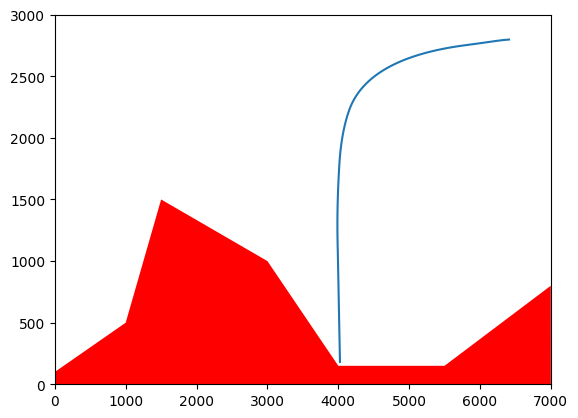

In [8]:
coordinates = df[['x', 'y']].to_numpy()
landing_coordinates = np.array([list(map(int, line.split(' '))) for line in infos[0]['landing_coords']] + [[7000, 0], [0, 0]])
poly = Polygon(landing_coordinates, facecolor='r')

fig, ax = plt.subplots()
ax.add_patch(poly)
ax.plot(coordinates[:, 0], coordinates[:, 1])
ax.set_xlim([0, 7000])
ax.set_ylim([0, 3000])


## Stesstest 100 games

In [9]:
%%time

n = 100

import time
from MarsLanderGymEnv import MarsLanderGymEnv

with MarsLanderGymEnv() as env:
    run_times = []

    start = time.time()

    for episode in range(n):
        s = time.time()
        done = False
        obs = env.reset()
        while True:  # not done:
            random_action = env.action_space.sample()
            # print("action", random_action)
            obs, reward, done, truncated, info = env.step(random_action)
            # print('reward', reward)
            if done:
                # print("is_done")
                break
        e = time.time()
        run_times.append([episode, (e - s) * 1000])

    end = time.time()

    run_times = np.array(run_times)


CPU times: user 162 ms, sys: 38.2 ms, total: 200 ms
Wall time: 1.74 s


## looks like hotspot optimization in node vm

Text(0.5, 1.0, 'runtime over first 100 runs')

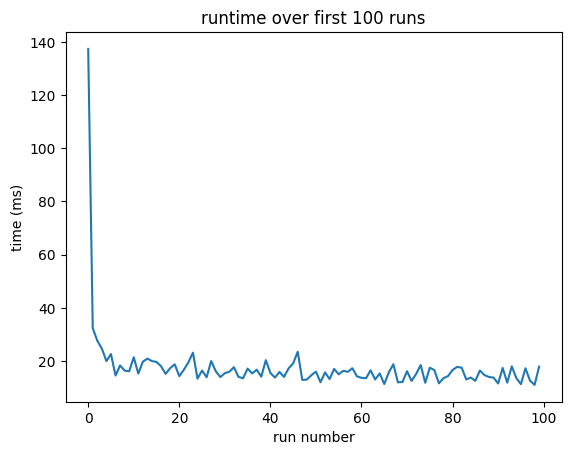

In [10]:
fig, ax = plt.subplots()
display_lim = n
ax.plot(run_times[:display_lim, 0], run_times[:display_lim, 1])
ax.set_xlabel('run number')
ax.set_ylabel('time (ms)')
ax.set_title(f'runtime over first {display_lim} runs')